<a href="https://colab.research.google.com/github/saponew/James-Bond/blob/main/gb_model_rank_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bayesian-optimization

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from pathlib import Path
csvpath = Path('/content/drive/MyDrive/Project 2/Data/Data tables/all_cusips_core_rating_shifted_df_v4_MACRO_FINAL.csv')

df = pd.read_csv(csvpath, parse_dates=True, index_col='date_fundamentals')

In [ ]:
df.dtypes

Unnamed: 0                                      int64
Unnamed: 0.1                                  float64
cusip_company_part                             object
siccode_fundamentals                            int64
ticker_fundamentals                            object
company_name_fundamentals                      object
revenueusd                                    float64
ebitdausd                                     float64
ebitdamargin                                  float64
netinccmnusd                                  float64
netmargin                                     float64
cashnequsd                                    float64
workingcapital                                float64
debtusd                                       float64
liabilities                                   float64
equityusd                                     float64
marketcap                                     float64
ev                                            float64
fcf                         

In [ ]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [ ]:
# data wrangling: drop NaN, cap timedelta @60
df_final = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df_final.dropna(inplace=True)
df_final = df_final.loc[df_final['timedelta'] <= 60]

print(df_final.info)
df_final.head()

<bound method DataFrame.info of                   cusip_company_part  ...  index_fred_macro_vix
date_fundamentals                     ...                      
2012-06-27                    00724F  ...                 20.38
2012-06-27                    00724F  ...                 20.38
2012-07-05                    026375  ...                 16.66
2012-07-19                    05329W  ...                 16.16
2012-07-19                    126408  ...                 16.16
...                              ...  ...                   ...
2020-12-18                    891092  ...                 21.93
2020-12-18                    00846U  ...                 21.93
2020-12-18                    00846U  ...                 21.93
2020-12-18                    00846U  ...                 21.93
2021-02-12                    620076  ...                 21.25

[13498 rows x 57 columns]>


,cusip_company_part,siccode_fundamentals,ticker_fundamentals,company_name_fundamentals,revenueusd,ebitdausd,ebitdamargin,netinccmnusd,netmargin,cashnequsd,workingcapital,debtusd,liabilities,equityusd,marketcap,ev,fcf,ncfdebt,currentratio,de,divyield,epsusd,payoutratio,evebitda,pb,pe,isin,currency,close_edi,mktclosedate,secid,uscode,coupon_x,maturity_date,timedelta,cusip,maturity,rating,date,coupon_y,issuer_cusip,rank,timedelta_2,date_fundamentals_shifted,rating_shifted,rank_shifted,rank_diff,maturity_year,rank_change,rank_change_2,observed_date,percent_fred_macro_yc_30_yr,percent_fred_macro_yc_3_mo,percentchange_fred_macro_gdp,dollars_fred_crude_oil_prices,percent_fred_five_year_breakeven_inflation,index_fred_macro_vix
date_fundamentals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-06-27,00724F,7372,ADBE,Adobe Inc,1.124449e+09,3.883770e+08,0.345,223876016.0,0.199,951238080.0,2.525163e+09,1.510094e+09,3.266186e+09,6.099646e+09,1.544626e+10,1.600512e+10,387451008.0,-2290000.0,3.027,0.535,0.000,0.45,0.000,11.385,2.532,19.856001,US00724FAA93,USD,105.124,2012-06-27,1758557.0,00724FAA9,3.25%,2015-02-01,0,00724FAA9,2015-02-01,BAA1,2012-06-15,3.250,00724F,8.0,12.0,2013-01-22,BAA1,8.0,0.0,2.600,0.0,0.0,2012-06-27,2.71,0.10,2.9,79.34,1.68,20.38
2012-06-27,00724F,7372,ADBE,Adobe Inc,1.124449e+09,3.883770e+08,0.345,223876016.0,0.199,951238080.0,2.525163e+09,1.510094e+09,3.266186e+09,6.099646e+09,1.544626e+10,1.600512e+10,387451008.0,-2290000.0,3.027,0.535,0.000,0.45,0.000,11.385,2.532,19.856001,US00724FAB76,USD,111.915,2012-06-27,1758481.0,00724FAB7,4.75%,2020-02-01,0,00724FAB7,2020-02-01,BAA1,2012-06-15,4.750,00724F,8.0,12.0,2013-01-22,BAA1,8.0,0.0,7.603,0.0,0.0,2012-06-27,2.71,0.10,2.9,79.34,1.68,20.38
2012-07-05,026375,2771,AM1,American Greetings Corp,3.931060e+08,2.626500e+07,0.067,7250000.5,0.018,60180000.0,2.500000e+08,2.251810e+08,8.090370e+08,6.794340e+08,4.851067e+08,6.501076e+08,33485000.0,0.0,1.842,1.191,0.052,0.20,0.750,4.348,0.714,15.229000,US026375AP03,USD,105.250,2012-07-05,3295358.0,026375AP0,7.375%,2021-12-01,0,026375AP0,2021-12-01,BA2,2012-06-15,7.375,026375,12.0,20.0,2013-01-02,BA2,12.0,0.0,9.414,0.0,0.0,2012-07-05,2.74,0.09,2.9,87.74,1.80,16.66
2012-07-19,05329W,5500,AN,Autonation Inc,3.904500e+09,1.833000e+08,0.047,78600000.0,0.020,62100000.0,1.686000e+08,2.028500e+09,4.933200e+09,1.528200e+09,4.922053e+09,6.888453e+09,-13500000.0,144500000.0,1.062,3.228,0.000,0.65,0.000,10.145,3.221,16.874001,US05329WAJ18,USD,110.152,2012-07-19,1856738.0,05329WAJ1,6.75%,2018-04-15,0,05329WAJ1,2018-04-15,BA2,2012-06-15,6.750,05329W,12.0,34.0,2013-02-15,BA2,12.0,0.0,5.742,0.0,0.0,2012-07-19,2.59,0.09,2.9,89.07,1.82,16.16
2012-07-19,126408,4011,CSX,Csx Corp,3.012000e+09,1.211000e+09,0.402,512000000.0,0.170,642000000.0,-2.030000e+08,9.089000e+09,2.069400e+10,8.895000e+09,2.369094e+10,3.213794e+10,93000000.0,-42000000.0,0.921,2.326,0.022,0.49,0.286,7.062,2.663,12.588000,US126408BP76,USD,127.500,2012-07-19,1070939.0,126408BP7,7.25%,2027-05-01,0,126408BP7,2027-05-01,BAA3,2012-06-15,7.250,126408,10.0,34.0,2013-02-19,BAA2,9.0,1.0,14.792,1.0,1.0,2012-07-19,2.59,0.09,2.9,89.07,1.82,16.16


In [ ]:
# Set x variable list of features
x_var_list = ['siccode_fundamentals', 'revenueusd', 'ebitdausd',
       'ebitdamargin', 'netinccmnusd', 'netmargin', 'cashnequsd',
       'workingcapital', 'debtusd', 'liabilities', 'equityusd', 'marketcap',
       'ev', 'fcf', 'ncfdebt', 'currentratio', 'de', 'divyield', 'epsusd',
       'payoutratio', 'evebitda', 'pb', 'pe', 'close_edi', 'coupon_x',
       'percent_fred_macro_yc_30_yr',
       'percent_fred_macro_yc_3_mo', 'percentchange_fred_macro_gdp',
       'dollars_fred_crude_oil_prices',
       'percent_fred_five_year_breakeven_inflation', 'index_fred_macro_vix', 'maturity_year']

# Filter by x-variable list
df_final[x_var_list].tail()

,siccode_fundamentals,revenueusd,ebitdausd,ebitdamargin,netinccmnusd,netmargin,cashnequsd,workingcapital,debtusd,liabilities,equityusd,marketcap,ev,fcf,ncfdebt,currentratio,de,divyield,epsusd,payoutratio,evebitda,pb,pe,close_edi,coupon_x,percent_fred_macro_yc_30_yr,percent_fred_macro_yc_3_mo,percentchange_fred_macro_gdp,dollars_fred_crude_oil_prices,percent_fred_five_year_breakeven_inflation,index_fred_macro_vix,maturity_year
date_fundamentals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-18,3524,8.409570e+08,117440000.0,0.140,72196000.0,0.086,4.798920e+08,5.718510e+08,8.577640e+08,1.738400e+09,1.114828e+09,1.004494e+10,1.042282e+10,202057000.0,-100000000.0,1.668,1.559,0.011,0.67,0.373,20.186,9.010,30.467,132.717,7.80%,1.68,0.08,33.1,47.02,1.92,21.93,6.493
2020-12-18,3826,1.483000e+09,378000000.0,0.255,222000000.0,0.150,1.441000e+09,1.948000e+09,2.359000e+09,4.754000e+09,4.873000e+09,3.650589e+10,3.742389e+10,350000000.0,35000000.0,2.328,0.976,0.006,0.72,0.250,30.475,7.491,50.773,104.236,3.20%,1.68,0.08,33.1,47.02,1.92,21.93,1.786
2020-12-18,3826,1.483000e+09,378000000.0,0.255,222000000.0,0.150,1.441000e+09,1.948000e+09,2.359000e+09,4.754000e+09,4.873000e+09,3.650589e+10,3.742389e+10,350000000.0,35000000.0,2.328,0.976,0.006,0.72,0.250,30.475,7.491,50.773,104.236,3.20%,1.68,0.08,33.1,47.02,1.92,21.93,1.786
2020-12-18,3826,1.483000e+09,378000000.0,0.255,222000000.0,0.150,1.441000e+09,1.948000e+09,2.359000e+09,4.754000e+09,4.873000e+09,3.650589e+10,3.742389e+10,350000000.0,35000000.0,2.328,0.976,0.006,0.72,0.250,30.475,7.491,50.773,109.804,3.05%,1.68,0.08,33.1,47.02,1.92,21.93,5.764
2021-02-12,3663,2.273000e+09,683000000.0,0.300,412000000.0,0.181,1.254000e+09,8.380000e+08,5.577000e+09,1.141700e+10,-5.580000e+08,3.072765e+10,3.505065e+10,638000000.0,-203000000.0,1.240,-20.461,0.014,2.42,0.293,19.483,-55.067,32.379,110.250,5.22%,1.94,0.05,4.0,57.95,2.35,21.25,76.685


In [ ]:
df_final['coupon_x'].replace('%', '', regex=True, inplace=True)
df_final['coupon_x'] = df_final['coupon_x'].astype('float') / 100

In [ ]:
from collections import Counter
# X = df_final[x_var_list]
# y = df_final['rank_change']

# X['coupon_x'].replace('%', '', regex=True, inplace=True)
# X['coupon_x'] = X['coupon_x'].astype('float') / 100

# np.unique(y, return_counts = True)
Counter(y)

Counter({0.0: 12470, 1.0: 1028})

In [ ]:
len(df_final) * .66

8908.68

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
X = df_final[x_var_list]
y = df_final['rank_change']

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Creating the scaler instance
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train)

# Transforming the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
learning_rate = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rate:
    gb_clf = GradientBoostingClassifier(n_estimators=2, learning_rate=learning_rate, max_features=8, max_depth=3, random_state=23)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.925
Accuracy score (validation): 0.921
Learning rate:  0.075
Accuracy score (training): 0.925
Accuracy score (validation): 0.921
Learning rate:  0.1
Accuracy score (training): 0.925
Accuracy score (validation): 0.921
Learning rate:  0.25
Accuracy score (training): 0.936
Accuracy score (validation): 0.936
Learning rate:  0.5
Accuracy score (training): 0.937
Accuracy score (validation): 0.933
Learning rate:  0.75
Accuracy score (training): 0.937
Accuracy score (validation): 0.933
Learning rate:  1
Accuracy score (training): 0.932
Accuracy score (validation): 0.927


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=3, learning_rate=0.5, max_features=8, max_depth=4, random_state=23)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[  54   99    0]
 [  15 3091    4]
 [   0   66   46]]
Classification Report
              precision    recall  f1-score   support

        -1.0       0.78      0.35      0.49       153
         0.0       0.95      0.99      0.97      3110
         1.0       0.92      0.41      0.57       112

    accuracy                           0.95      3375
   macro avg       0.88      0.59      0.68      3375
weighted avg       0.94      0.95      0.94      3375



In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 1","Actual 2", "Actual 3"], 
               columns=["Predicted 1","Predicted 2", "Predicted 3"])

acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 1,Predicted 2,Predicted 3
Actual 1,54,99,0
Actual 2,15,3091,4
Actual 3,0,66,46


Accuracy Score : 0.9454814814814815
Classification Report
              precision    recall  f1-score   support

        -1.0       0.78      0.35      0.49       153
         0.0       0.95      0.99      0.97      3110
         1.0       0.92      0.41      0.57       112

    accuracy                           0.95      3375
   macro avg       0.88      0.59      0.68      3375
weighted avg       0.94      0.95      0.94      3375



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

0.5858487124753439

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.metrics import classification_report_imbalanced
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

       -1.0       0.78      0.35      1.00      0.49      0.59      0.33       153
        0.0       0.95      0.99      0.38      0.97      0.61      0.40      3110
        1.0       0.92      0.41      1.00      0.57      0.64      0.39       112

avg / total       0.94      0.95      0.43      0.94      0.61      0.39      3375



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 3,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.5,
          'loss': 'ls'}




In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression


reg = GradientBoostingRegressor(random_state=0)

reg.fit(X_train, y_train)

reg.predict(X_test[1:2])

reg.score(X_test, y_test)

0.4345219168598107

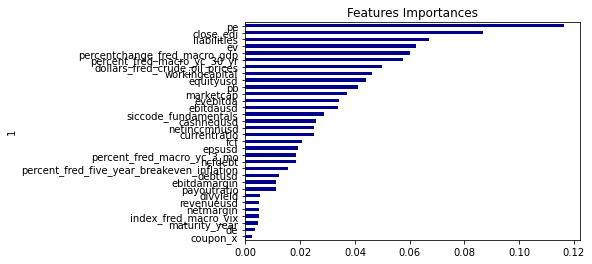

In [ ]:
importances = gb_clf2.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(gb_clf2.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(gb_clf2.feature_importances_, X.columns), reverse=True))

importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='darkblue', title= 'Features Importances', legend=False)

In [ ]:
importances_sorted

,Feature Importances
1,
coupon_x,0.002510
de,0.003370
maturity_year,0.004737
index_fred_macro_vix,0.004905
netmargin,0.005071
revenueusd,0.005162
divyield,0.005372
payoutratio,0.011274
ebitdamargin,0.011279


In [ ]:
importances_sorted.to_csv('/content/drive/MyDrive/Project 2/Data/Data tables/gboost_importance.csv')

In [ ]:
 # Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9454814814814815


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

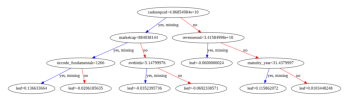

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

plot_tree(model)
plt.show()

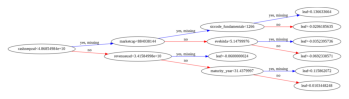

In [ ]:
	
plot_tree(model, num_trees=0, rankdir='LR')

In [ ]:
feature_df = df_final[x_var_list]
feature_df.to_csv('/content/drive/MyDrive/Project 2/Data/Data tables/feature_df.csv')

column = ['rank']
y_test = pd.DataFrame(y_test)
y_test.columns = column 
y_test['rank'].unique()

array([10.,  9.,  6.,  7.,  8., 16., 19.,  4., 13., 12.,  5.,  3., 20.,
       11., 18., 14., 15., 17., 21.])